In [1]:
import pandas as pd

In [2]:
chicago_taxi_df = pd.read_csv('chicago_taxi_data.csv')

# Data Preparation

In [4]:
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_seconds'] > 0]
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_miles'] > 0]

In [5]:
# Convert trip_start_timestamp to datetime
chicago_taxi_df['trip_start_timestamp'] = pd.to_datetime(chicago_taxi_df['trip_start_timestamp'])

# Extract day of the week, hour, and month from the timestamp
chicago_taxi_df['day_of_week'] = chicago_taxi_df['trip_start_timestamp'].dt.dayofweek
chicago_taxi_df['day_name'] = chicago_taxi_df['trip_start_timestamp'].dt.day_name()
chicago_taxi_df['hour'] = chicago_taxi_df['trip_start_timestamp'].dt.hour
chicago_taxi_df['month'] = chicago_taxi_df['trip_start_timestamp'].dt.month
chicago_taxi_df['month_name'] = chicago_taxi_df['trip_start_timestamp'].dt.month_name()
chicago_taxi_df['date'] = chicago_taxi_df['trip_start_timestamp'].dt.date

In [6]:
chicago_taxi_df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,day_of_week,day_name,hour,month,month_name,date
0,d7bf7332e89c6597d682495ac78a325c2ed4183f,d0653a3c1a990641559a9e6e7c0e07db3765fe11e48ad7...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,1080.0,3.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
1,c8769473b60b18f700afce0f812f6d80c3616ca7,21c5d83c2cb73035c6c4d35da452ff1714aff86f5efb32...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,240.0,0.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
2,c52d1cd141c3036d091ed85cbf7a973cc5c1243e,a6c3cb7ab4c037a7db9e2fd3513f28e0ff17c8547a70bd...,2018-01-01 00:15:00,2018-01-01T00:15:00.000,60.0,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
3,b5714d1d2118642f789ab0fec542f597f986c251,d8238dd38b47fc0268e0bd92bba094676752dfefeafea9...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,840.0,2.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
5,594e15b562a96bd7cafac7211fb71ff4331ee803,45ae9d400abb9327b717e4d8849843ad78e40d7a72e324...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,720.0,6.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01


In [7]:
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482177 entries, 0 to 549996
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     482177 non-null  object        
 1   taxi_id                     482177 non-null  object        
 2   trip_start_timestamp        482177 non-null  datetime64[ns]
 3   trip_end_timestamp          482177 non-null  object        
 4   trip_seconds                482177 non-null  float64       
 5   trip_miles                  482177 non-null  float64       
 6   pickup_census_tract         306256 non-null  float64       
 7   dropoff_census_tract        304495 non-null  float64       
 8   pickup_community_area       440815 non-null  float64       
 9   dropoff_community_area      429922 non-null  float64       
 10  fare                        482170 non-null  float64       
 11  tips                        482170 non-null 

In [8]:
chicago_taxi_df.describe()

,trip_start_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,day_of_week,hour,month
count,482177,482177.000000,482177.000000,3.062560e+05,3.044950e+05,440815.000000,429922.000000,482170.000000,482170.000000,340655.000000,482170.000000,482170.000000,440857.000000,440857.000000,431156.000000,431156.000000,482177.000000,482177.000000,482177.0
mean,2018-01-07 00:41:41.693776384,760.863303,3.844461,1.703141e+10,1.703137e+10,25.736758,21.913596,12.866763,1.539311,0.002411,0.920909,15.447353,41.899708,-87.662757,41.899357,-87.651834,2.387615,13.201194,1.0
min,2018-01-01 00:15:00,1.000000,0.010000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625,0.000000,0.000000,1.0
25%,2018-01-04 08:00:00,337.000000,0.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.655879,41.880994,-87.655998,1.000000,9.000000,1.0
50%,2018-01-06 21:15:00,540.000000,1.490000,1.703128e+10,1.703128e+10,28.000000,24.000000,7.750000,0.000000,0.000000,0.000000,9.250000,41.892042,-87.632746,41.892073,-87.632746,2.000000,14.000000,1.0
75%,2018-01-10 05:15:00,900.000000,3.700000,1.703184e+10,1.703184e+10,32.000000,32.000000,13.250000,2.000000,0.000000,1.000000,15.000000,41.901207,-87.626211,41.906026,-87.626211,4.000000,18.000000,1.0
max,2018-01-12 10:30:00,84325.000000,527.100000,1.703198e+10,1.703198e+10,77.000000,77.000000,6001.200000,162.750000,75.000000,1414.120000,6001.200000,42.015934,-87.534903,42.021224,-87.534903,6.000000,23.000000,1.0
std,NaN,1045.870981,5.692938,3.439489e+05,3.304136e+05,20.375974,17.107250,19.315538,2.723360,0.240304,3.709279,21.887671,0.039890,0.078765,0.038070,0.055631,1.684488,5.790474,0.0


# Data Exploration

## trip_miles histogram

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

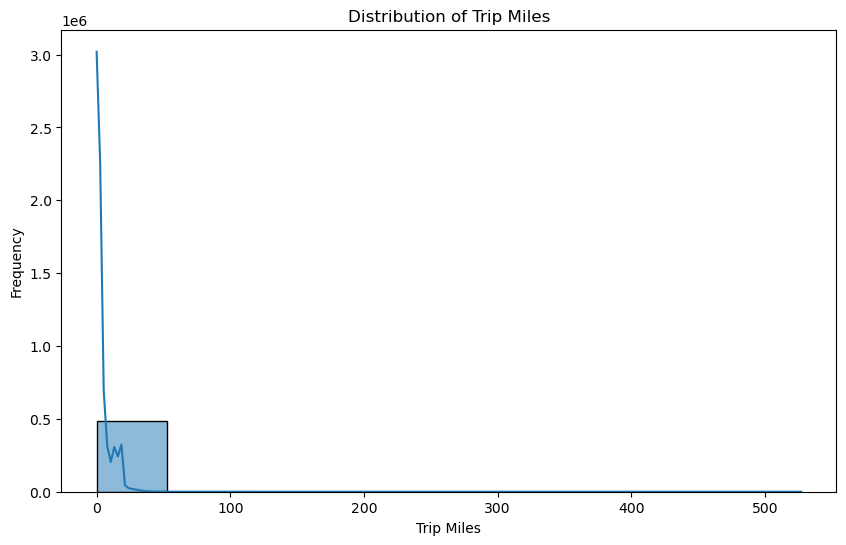

In [12]:
# Plot a distribution plot for the 'trip_miles' variable using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_miles'], bins=10, kde=True)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Miles')
plt.show()

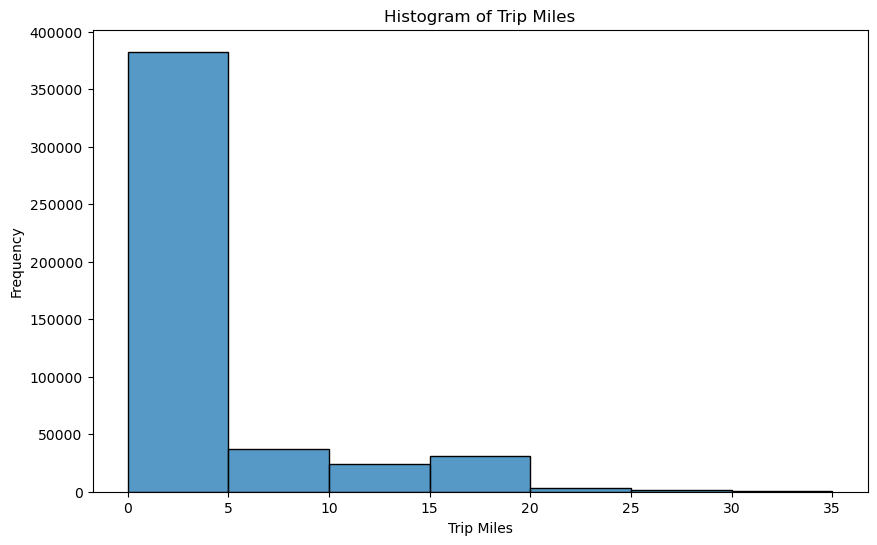

In [13]:
# Define the bin edges
bins = range(0, 36, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_miles'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

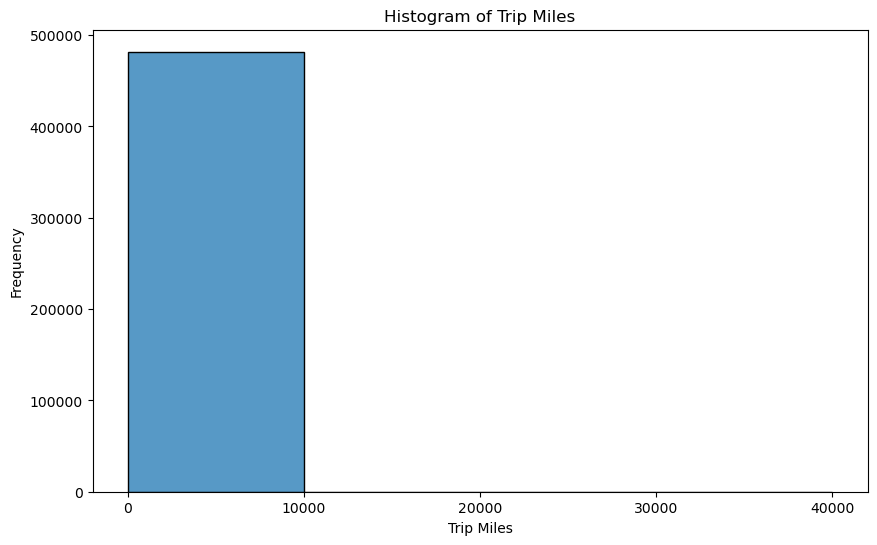

In [14]:
# Define the bin edges
bins = range(0, 50000, 10000)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_seconds'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [15]:
# Convert trip_seconds to trip_minutes
chicago_taxi_df['trip_minutes'] = chicago_taxi_df['trip_seconds'] / 60

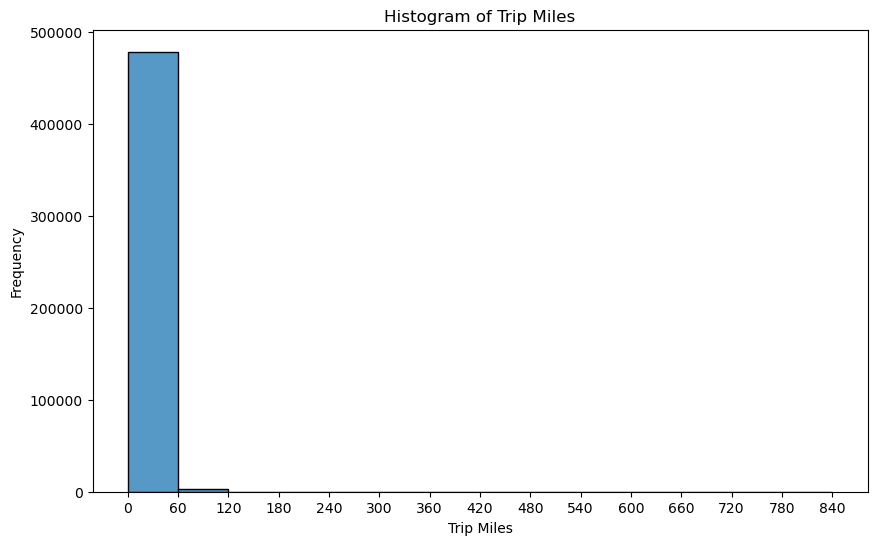

In [16]:
# Define the bin edges
bins = range(0, 900, 60)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_minutes'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [17]:
# Select rows where trip_minutes is <= 60
filtered_df = chicago_taxi_df[chicago_taxi_df['trip_minutes'] <= 60]

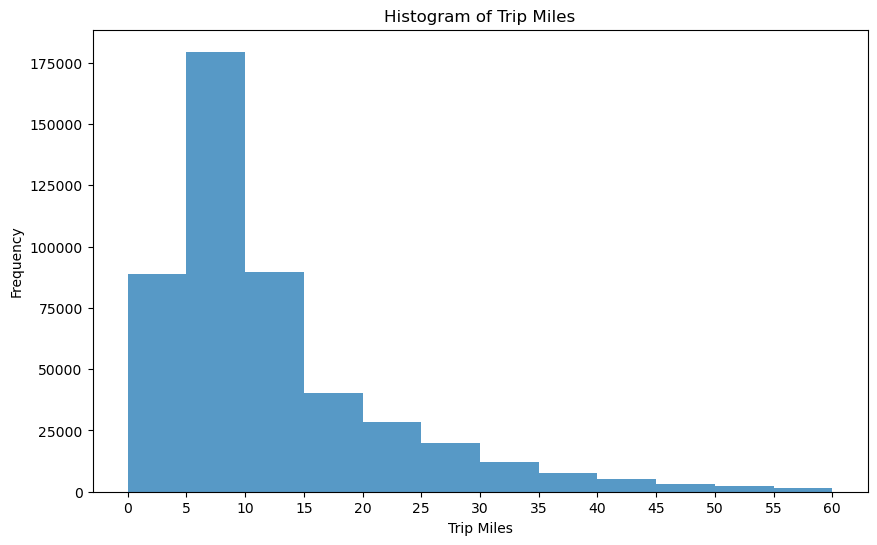

In [18]:
# Define the bin edges
bins = range(0, 65, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['trip_minutes'], bins=bins, edgecolor=None)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## taxi companies

In [20]:
print("taxi companies:", chicago_taxi_df['company'].nunique())

taxi companies: 65


In [21]:
chicago_taxi_df['company'].value_counts()

company
Flash Cab                                       72388
Taxi Affiliation Service Yellow                 39931
Chicago Carriage Cab Corp                       38212
Yellow Cab                                      35172
City Service                                    34569
                                                ...  
3721 - Santamaria Express, Alvaro Santamaria       24
5062 - 34841 Sam Mestas                            11
3669 - 85800 Jordan Taxi Inc                        9
2809 - 95474 C & D Cab Co Inc.                      6
2241 - 44667 - Felman Corp, Manuel Alonso           5
Name: count, Length: 65, dtype: int64

## fares histogram

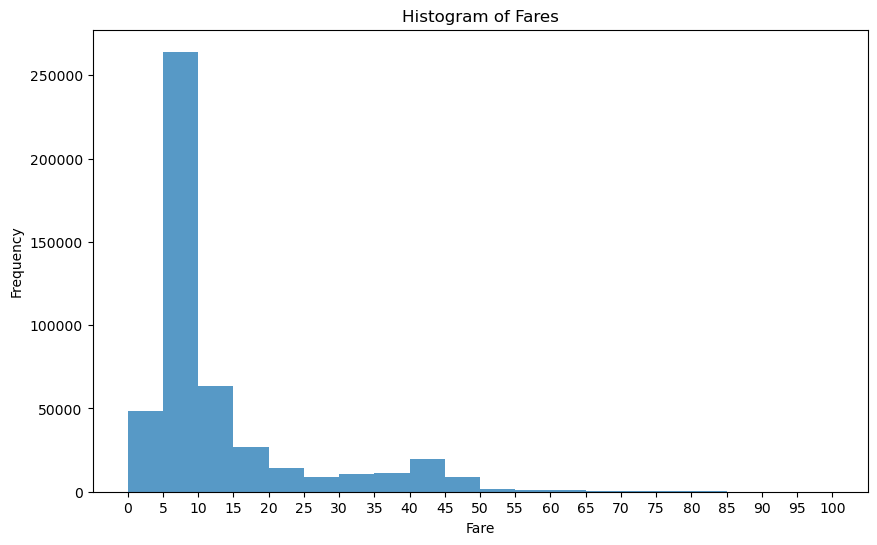

In [23]:
# Define the bin edges
bins = range(0, 105, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['fare'], bins=bins, edgecolor=None)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fares')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## payment type barplot

In [25]:
chicago_taxi_df['payment_type'].value_counts()

payment_type
Cash           263858
Credit Card    213751
Mobile           1495
Prcard           1468
Unknown           661
No Charge         527
Split             179
Dispute           139
Pcard              99
Name: count, dtype: int64

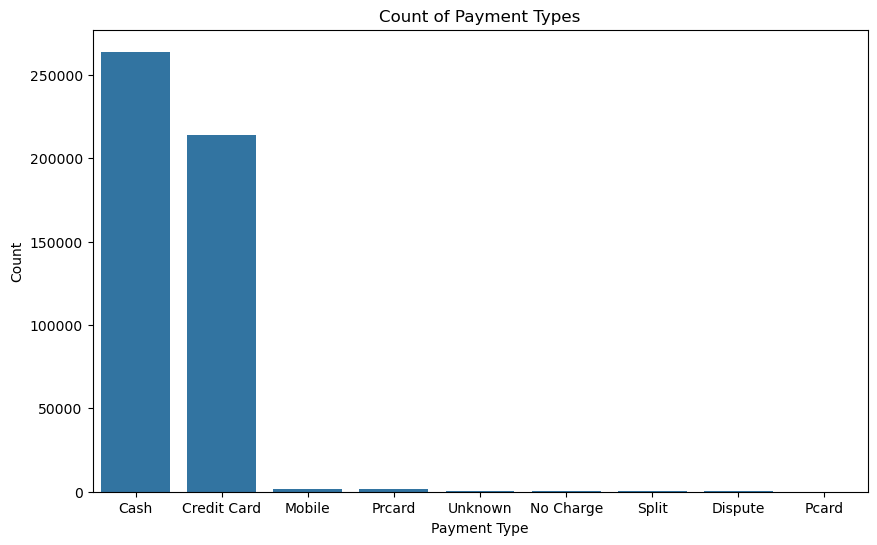

In [26]:
# Count the occurrences of each value in 'payment_type'
payment_counts = chicago_taxi_df['payment_type'].value_counts()

# Plot the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Payment Types')
plt.show()

## total cost by payment type histogram

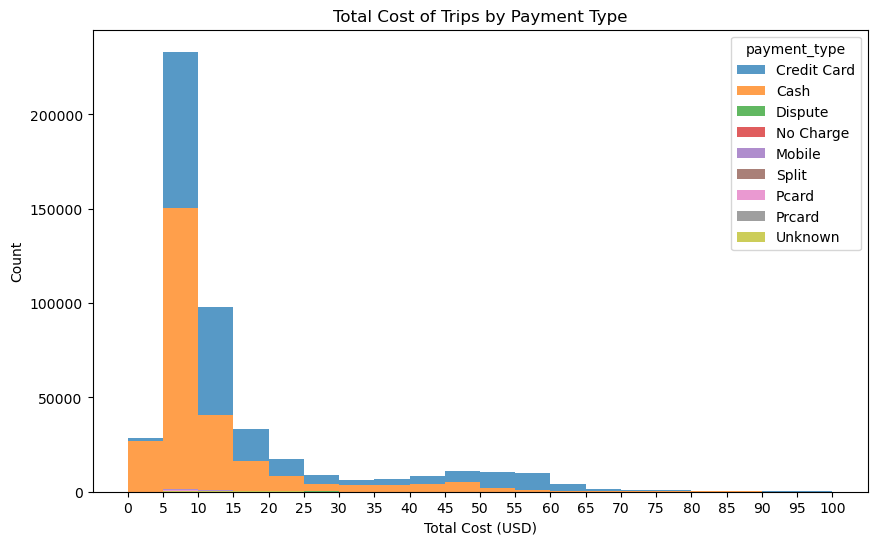

In [28]:
# Define the bin edges
bins = range(0, 105, 5)

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=chicago_taxi_df, x='trip_total', hue='payment_type', multiple='stack', bins=bins, edgecolor=None)
plt.xlabel('Total Cost (USD)')
#plt.ylabel('Frequency')
plt.title('Total Cost of Trips by Payment Type')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## cumulative percentage of trip miles histogram

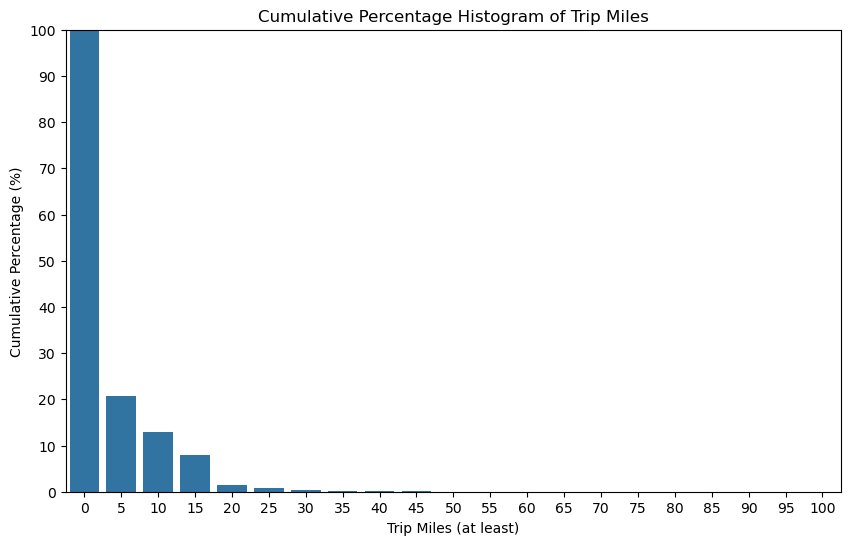

In [30]:
# Calculate cumulative counts
cumulative_counts = [(chicago_taxi_df['trip_miles'] >= b).sum() for b in bins]

# Calculate the total number of trips
total_trips = len(chicago_taxi_df)

# Calculate cumulative percentages
cumulative_percentages = [(count / total_trips) * 100 for count in cumulative_counts]

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({'Miles': bins, 'Percentage': cumulative_percentages})

# Plot the cumulative percentage histogram using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Miles', y='Percentage', data=cumulative_df)
plt.xlabel('Trip Miles (at least)')
plt.ylabel('Cumulative Percentage (%)')
plt.title('Cumulative Percentage Histogram of Trip Miles')
plt.ylim(0, 100)  # Set y-axis to range from 0 to 100%
plt.yticks(range(0, 110, 10))  # Add ticks at every 10%
plt.show()

## trips per day barplot

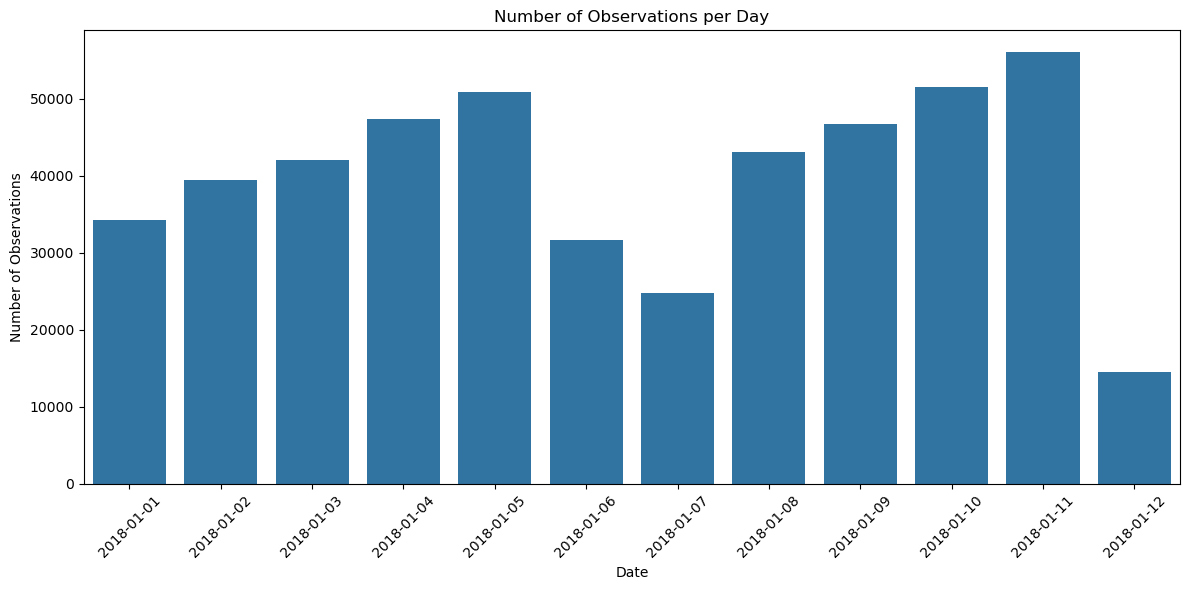

In [32]:
# Count observations per date
date_counts = chicago_taxi_df['date'].value_counts().sort_index().reset_index()
date_counts.columns = ['date', 'count']

# Plot the number of observations per day using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='count', data=date_counts)
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

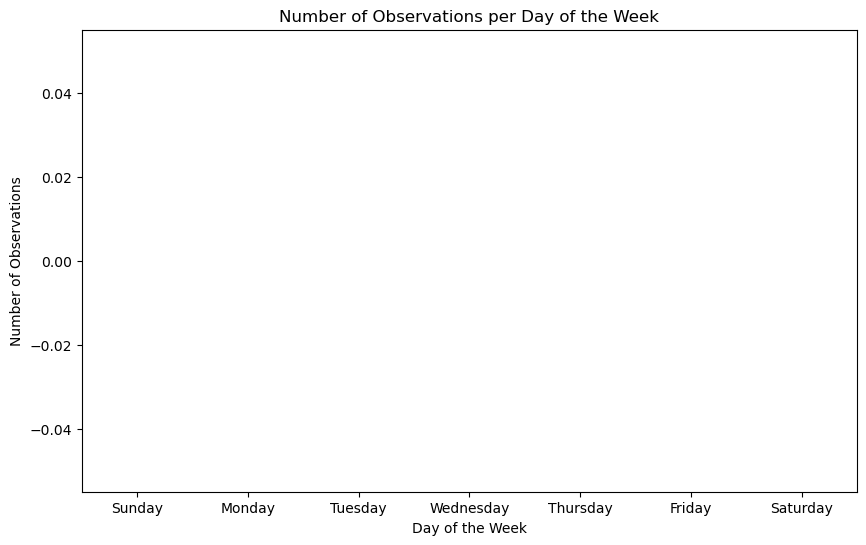

In [33]:
# Define the order of days for plotting
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Count observations per day of the week
day_counts = chicago_taxi_df['day_of_week'].value_counts().sort_index().reset_index()
day_counts.columns = ['day_of_week', 'count']

# Plot the number of observations per day of the week using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='count', data=day_counts, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day of the Week')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
chicago_taxi_df['company'].value_counts()

company
Flash Cab                                       72388
Taxi Affiliation Service Yellow                 39931
Chicago Carriage Cab Corp                       38212
Yellow Cab                                      35172
City Service                                    34569
                                                ...  
3721 - Santamaria Express, Alvaro Santamaria       24
5062 - 34841 Sam Mestas                            11
3669 - 85800 Jordan Taxi Inc                        9
2809 - 95474 C & D Cab Co Inc.                      6
2241 - 44667 - Felman Corp, Manuel Alonso           5
Name: count, Length: 65, dtype: int64

# Pickup Centroid Locations on Chicago Map

In [36]:
# Filter out rows where pickup_centroid_location is NaN
chicago_taxi_df = chicago_taxi_df.dropna(subset=['pickup_community_area'])
chicago_taxi_df = chicago_taxi_df.dropna(subset=['dropoff_community_area'])

chicago_taxi_df['pickup_community_area'] = chicago_taxi_df['pickup_community_area'].astype(int)
chicago_taxi_df['dropoff_community_area'] = chicago_taxi_df['dropoff_community_area'].astype(int)

In [37]:
import geopandas as gpd
from shapely.geometry import Point
import ast

In [38]:
#chicago_taxi_df = chicago_taxi_df.sample(n=1000)

In [39]:
# Convert the string representation into actual dictionaries
def parse_location(location_str):
    return ast.literal_eval(location_str)

chicago_taxi_df['pickup_centroid_location'] = chicago_taxi_df['pickup_centroid_location'].apply(parse_location)
chicago_taxi_df['dropoff_centroid_location'] = chicago_taxi_df['dropoff_centroid_location'].apply(parse_location)

# Extract coordinates and create Point geometries
def create_point(location_dict):
    coords = location_dict['coordinates']
    return Point(coords[0], coords[1])

chicago_taxi_df['pickup_geometry'] = chicago_taxi_df['pickup_centroid_location'].apply(create_point)
chicago_taxi_df['dropoff_geometry'] = chicago_taxi_df['dropoff_centroid_location'].apply(create_point)

# Create a GeoDataFrame
pickup_gdf = gpd.GeoDataFrame(chicago_taxi_df, geometry='pickup_geometry')
dropoff_gdf = gpd.GeoDataFrame(chicago_taxi_df, geometry='dropoff_geometry')

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
pickup_gdf.set_crs(epsg=4326, inplace=True)
dropoff_gdf.set_crs(epsg=4326, inplace=True)

# Path to the shapefile of Chicago's boundaries (you need to have this file locally)
# You can download a shapefile of Chicago's boundaries from an online source
shapefile_path = 'Boundaries - Community Areas (current)/geo_export_9804d3cb-37ef-427a-9192-e8f531d8262f.shp'

# Read the shapefile using GeoPandas
chicago_map = gpd.read_file(shapefile_path)

# Ensure the CRS of the shapefile matches the GeoDataFrame CRS
chicago_map = chicago_map.to_crs(epsg=4326)

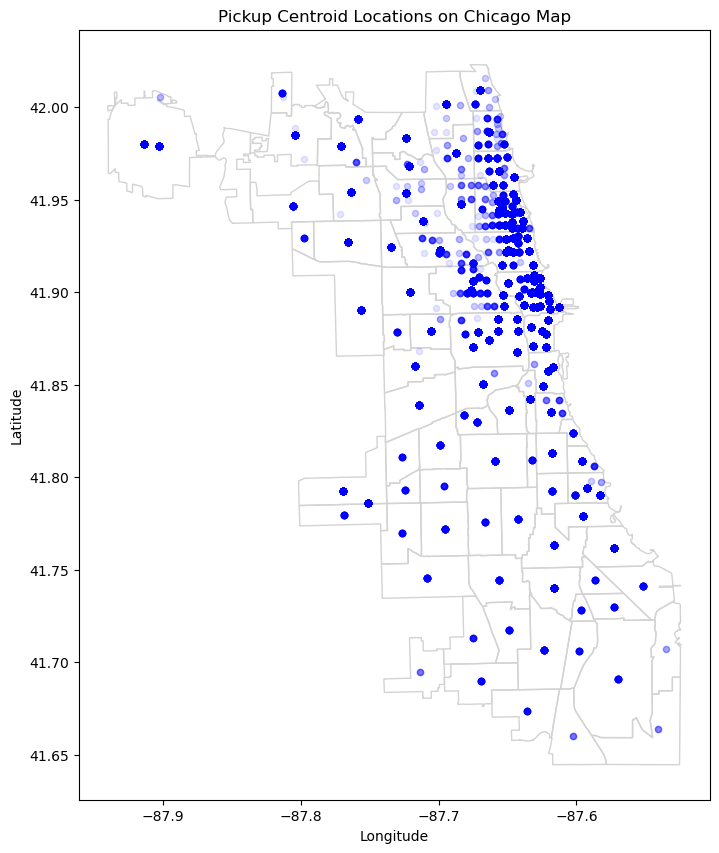

In [40]:
# Plot the map and the pickup locations
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.boundary.plot(ax=ax, linewidth=1, color='lightgray', zorder=1)
pickup_gdf.plot(ax=ax, marker='o', color='blue', markersize=20, zorder=3, alpha=0.1)
#dropoff_gdf.plot(ax=ax, marker='o', color='red', markersize=50, zorder=2, alpha=0.1)
plt.title('Pickup Centroid Locations on Chicago Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.grid(True)
plt.show()

# Dashboard

/var/folders/l2/9w71jzfn5vj666y5m4sqd5rc0000gn/T/ipykernel_4001/773689411.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


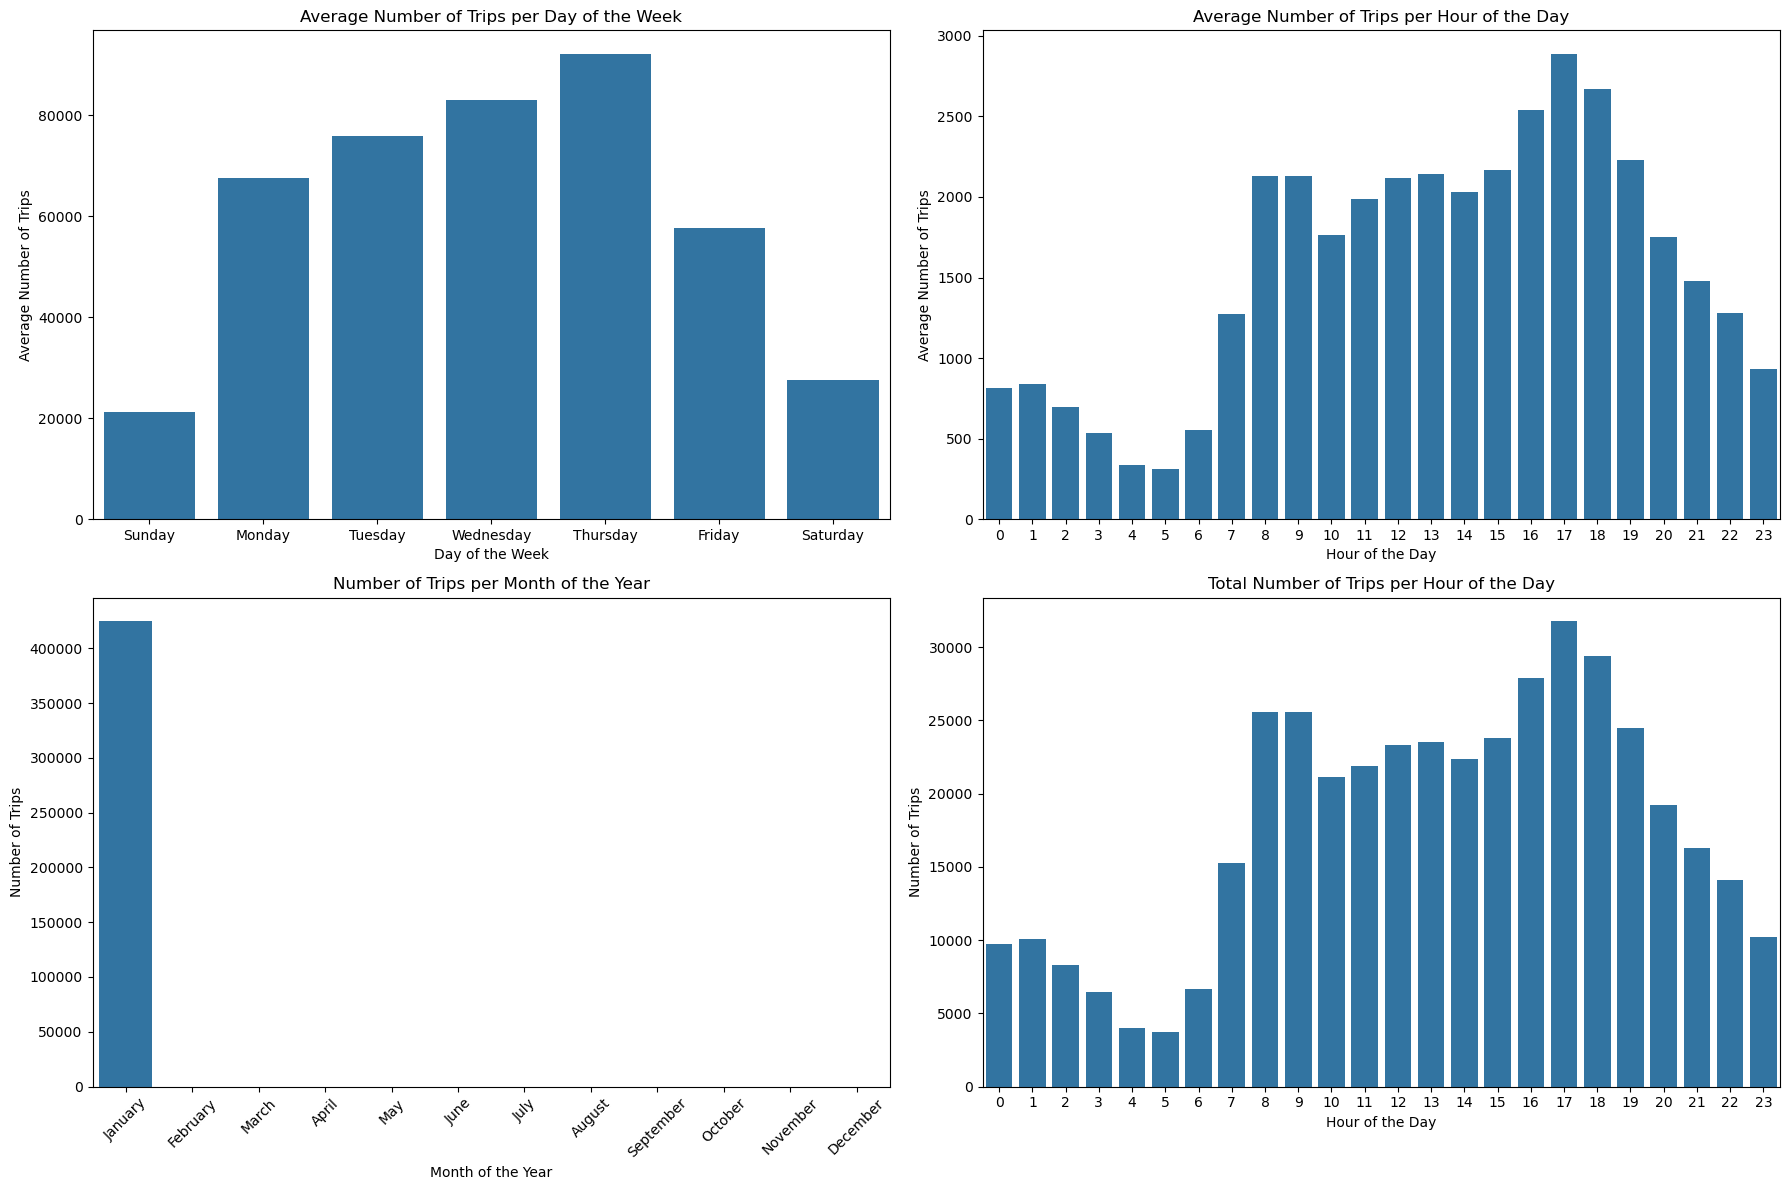

In [42]:
# Calculate the average number of trips per day of the week
avg_trips_per_day = chicago_taxi_df['day_name'].value_counts().sort_index()
avg_trips_per_day = avg_trips_per_day.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Group by date and hour, then count the number of trips
daily_hourly_trips = chicago_taxi_df.groupby(['date', 'hour']).size().reset_index(name='trip_count')

# Calculate the average number of trips per hour
avg_hourly_trips = daily_hourly_trips.groupby('hour')['trip_count'].mean()

# Count the number of trips per month
trips_per_month = chicago_taxi_df['month_name'].value_counts().sort_index()
trips_per_month = trips_per_month.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the average number of trips per day of the week
sns.barplot(x=avg_trips_per_day.index, y=avg_trips_per_day.values, ax=axes[0, 0])
axes[0, 0].set_xlabel('Day of the Week')
axes[0, 0].set_ylabel('Average Number of Trips')
axes[0, 0].set_title('Average Number of Trips per Day of the Week')

# Plot the average number of trips per hour of the day
sns.barplot(x=avg_hourly_trips.index, y=avg_hourly_trips.values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Average Number of Trips')
axes[0, 1].set_title('Average Number of Trips per Hour of the Day')
axes[0, 1].set_xticks(range(0, 24))

# Plot the number of trips per month
sns.barplot(x=trips_per_month.index, y=trips_per_month.values, ax=axes[1, 0])
axes[1, 0].set_xlabel('Month of the Year')
axes[1, 0].set_ylabel('Number of Trips')
axes[1, 0].set_title('Number of Trips per Month of the Year')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plot the total number of trips per hour of the day
hourly_trips = chicago_taxi_df.groupby('hour').size()
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Number of Trips')
axes[1, 1].set_title('Total Number of Trips per Hour of the Day')
axes[1, 1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Chicago Community Areas/Census Tracts

## Map of Chicago Community Areas

In [45]:
import geopandas as gpd

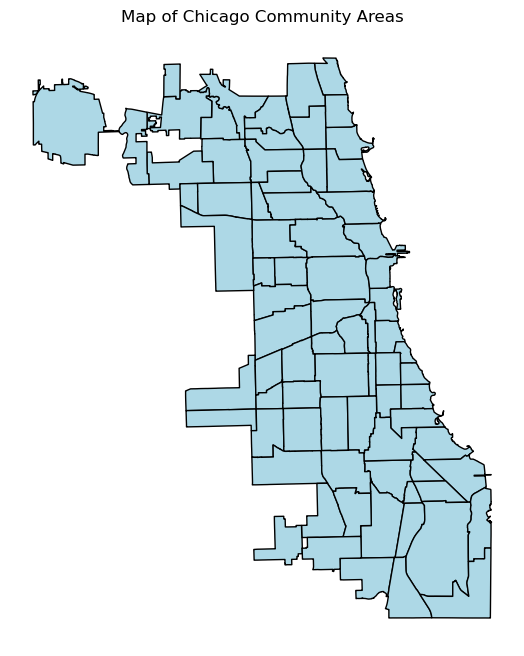

In [46]:
# Load the GeoJSON file
chicago_community_areas = gpd.read_file('Boundaries - Community Areas (current).geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
chicago_community_areas.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Map of Chicago Community Areas')

# Remove the axis
ax.axis('off')

plt.show()

## Map of Chicago Census Tracts

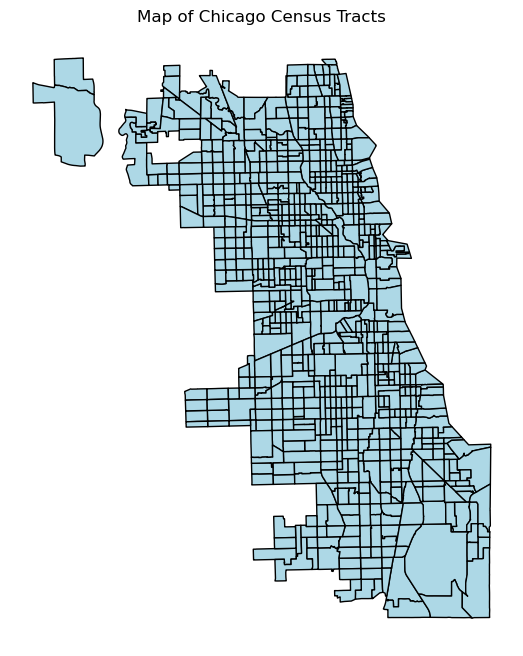

In [48]:
# Load the GeoJSON file
chicago_census_tracts = gpd.read_file('Boundaries - Census Tracts - 2010.geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
chicago_census_tracts.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Map of Chicago Census Tracts')

# Remove the axis
ax.axis('off')

plt.show()

## Map of Chicago Community Areas with Labels

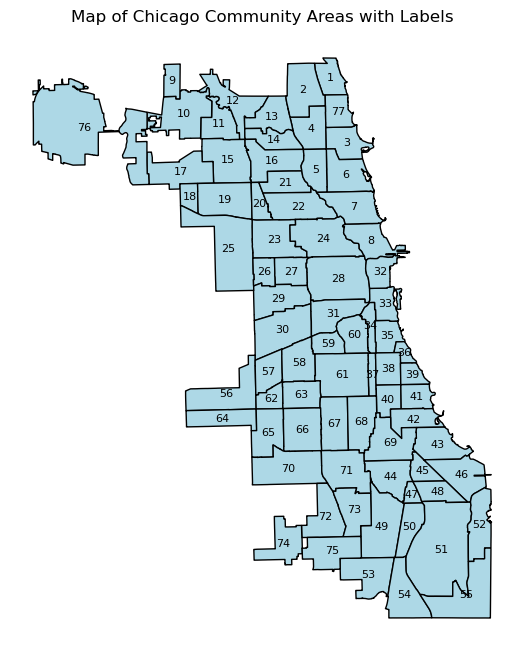

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))
chicago_community_areas.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels
for idx, row in chicago_community_areas.iterrows():
    plt.annotate(text=row['area_numbe'],  # Replace with the actual column name
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 ha='center', va='center', fontsize=8, color='black')

plt.title('Map of Chicago Community Areas with Labels')

# Remove the axis
ax.axis('off')

plt.show()

## Choropleth Map of Chicago Community Areas

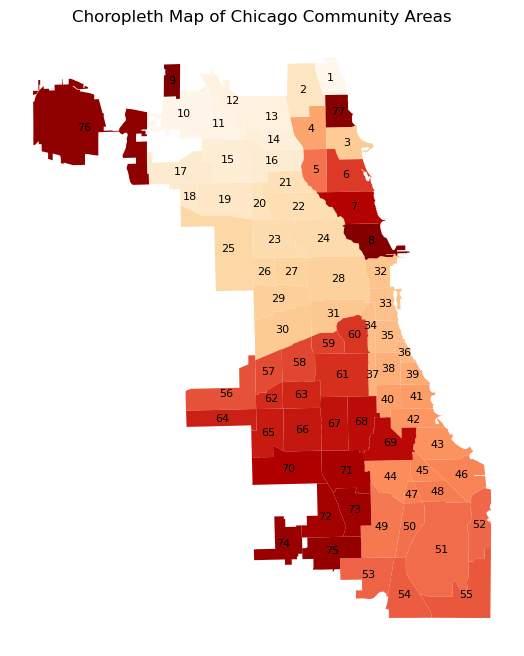

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))
chicago_community_areas.plot(column='area_num_1',  # Replace with the actual column name
             ax=ax, legend=False, cmap='OrRd',
             )

# Optionally, add labels for community area numbers
for idx, row in chicago_community_areas.iterrows():
    plt.annotate(text=row['area_numbe'],  # Replace with the actual column name for the area number
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 ha='center', va='center', fontsize=8, color='black')

plt.title('Choropleth Map of Chicago Community Areas')

# Remove the axis
ax.axis('off')

plt.show()

## Choropleth Map of Taxi Pickups in Chicago Community Areas

In [54]:
# Assuming df is your original DataFrame
# Step 1: Use value_counts() on the 'pickup_community_area' column
value_counts = chicago_taxi_df['pickup_community_area'].value_counts()

# Step 2: Convert the result to a DataFrame
pickup_df = value_counts.to_frame()

# Step 3: Reset the index to get a clean DataFrame with proper columns
pickup_df.reset_index(inplace=True)

# Step 4: Rename the columns for clarity
pickup_df.columns = ['pickup_community_area', 'trips']

# Step 5: Sort the DataFrame by the 'pickup_community_area' column
pickup_df = pickup_df.sort_values(by='pickup_community_area')

# Step 6: Reset the index of the sorted DataFrame
pickup_df.reset_index(drop=True, inplace=True)

# Now, value_counts_df is the new DataFrame with the count of observations per community area
pickup_df

,pickup_community_area,trips
0,1,2033
1,2,1900
2,3,5695
3,4,1996
4,5,1384
...,...,...
72,73,51
73,74,7
74,75,34
75,76,26191


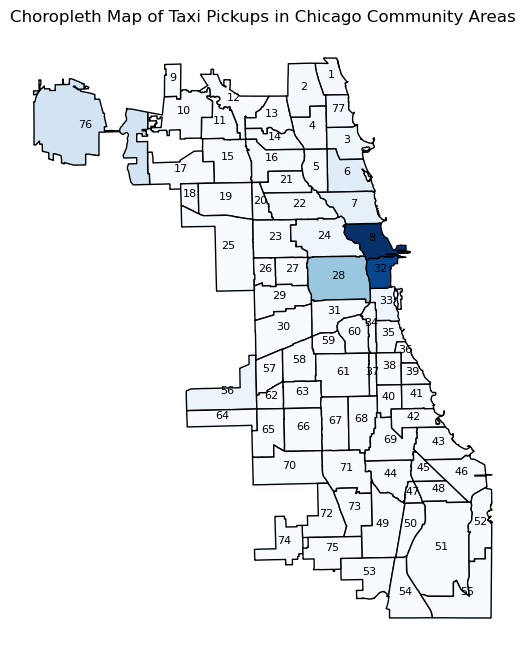

In [55]:
# Load the GeoJSON file
chicago_community_areas_gdf = gpd.read_file('Boundaries - Community Areas (current).geojson')  # Update with your file path
chicago_community_areas_gdf['area_numbe'] = chicago_community_areas_gdf['area_numbe'].astype(int)

# Merge GeoDataFrame with the taxi trip data
chicago_community_areas_gdf = chicago_community_areas_gdf.merge(pickup_df, left_on='area_numbe', right_on='pickup_community_area')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
chicago_community_areas_gdf.plot(column='trips', ax=ax, legend=False,
         legend_kwds={'label': "Number of Taxi Trips by Community Area",
                      'orientation': "vertical"},
         cmap='Blues',  # Color map for the choropleth
         edgecolor='black')  # Optional: Add borders to the community areas

# Add community area numbers to the map
for idx, row in chicago_community_areas_gdf.iterrows():
    plt.annotate(text=row['area_numbe'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Remove the axis
ax.axis('off')

# Add title
plt.title('Choropleth Map of Taxi Pickups in Chicago Community Areas')
plt.show()

## Choropleth Map of Taxi Dropoffs in Chicago Community Areas

In [57]:
# Assuming df is your original DataFrame
# Step 1: Use value_counts() on the 'pickup_community_area' column

# Step 2: Convert the result to a DataFrame
dropoff_df = chicago_taxi_df['dropoff_community_area'].value_counts().to_frame()

# Step 3: Reset the index to get a clean DataFrame with proper columns
dropoff_df.reset_index(inplace=True)

# Step 4: Rename the columns for clarity
dropoff_df.columns = ['dropoff_community_area', 'trips']

# Step 5: Sort the DataFrame by the 'pickup_community_area' column
dropoff_df = dropoff_df.sort_values(by='dropoff_community_area')

# Step 6: Reset the index of the sorted DataFrame
dropoff_df.reset_index(drop=True, inplace=True)

# Now, value_counts_df is the new DataFrame with the count of observations per community area
dropoff_df

,dropoff_community_area,trips
0,1,2620
1,2,2403
2,3,7219
3,4,3056
4,5,3423
...,...,...
72,73,72
73,74,35
74,75,77
75,76,11566


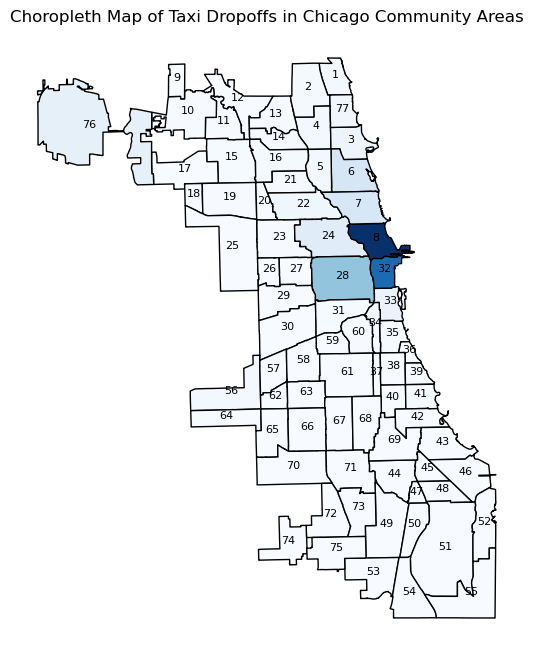

In [58]:
# Load the GeoJSON file
chicago_map_gdf = gpd.read_file('Boundaries - Community Areas (current).geojson')  # Update with your file path
chicago_map_gdf['area_numbe'] = chicago_map_gdf['area_numbe'].astype(int)

# Merge GeoDataFrame with the taxi trip data
chicago_map_gdf = chicago_map_gdf.merge(dropoff_df, left_on='area_numbe', right_on='dropoff_community_area')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
chicago_map_gdf.plot(column='trips', ax=ax, legend=False,
         legend_kwds={'label': "Number of Taxi Trips by Community Area",
                      'orientation': "vertical"},
         cmap='Blues',  # Color map for the choropleth
         edgecolor='black')  # Optional: Add borders to the community areas

# Add community area numbers to the map
for idx, row in chicago_map_gdf.iterrows():
    plt.annotate(text=row['area_numbe'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Remove the axis
ax.axis('off')

# Add title
plt.title('Choropleth Map of Taxi Dropoffs in Chicago Community Areas')
plt.show()

# Data Exploration (Contd.)

In [60]:
chicago_taxi_df = pd.read_csv('chicago_taxi_data.csv')

In [61]:
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_seconds'] > 0]
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_miles'] > 0]

In [62]:
chicago_taxi_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,482177.000000,482177.000000,3.062560e+05,3.044950e+05,440815.000000,429922.000000,482170.000000,482170.000000,340655.000000,482170.000000,482170.000000,440857.000000,440857.000000,431156.000000,431156.000000
mean,760.863303,3.844461,1.703141e+10,1.703137e+10,25.736758,21.913596,12.866763,1.539311,0.002411,0.920909,15.447353,41.899708,-87.662757,41.899357,-87.651834
std,1045.870981,5.692938,3.439489e+05,3.304136e+05,20.375974,17.107250,19.315538,2.723360,0.240304,3.709279,21.887671,0.039890,0.078765,0.038070,0.055631
min,1.000000,0.010000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,337.000000,0.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.655879,41.880994,-87.655998
50%,540.000000,1.490000,1.703128e+10,1.703128e+10,28.000000,24.000000,7.750000,0.000000,0.000000,0.000000,9.250000,41.892042,-87.632746,41.892073,-87.632746
75%,900.000000,3.700000,1.703184e+10,1.703184e+10,32.000000,32.000000,13.250000,2.000000,0.000000,1.000000,15.000000,41.901207,-87.626211,41.906026,-87.626211
max,84325.000000,527.100000,1.703198e+10,1.703198e+10,77.000000,77.000000,6001.200000,162.750000,75.000000,1414.120000,6001.200000,42.015934,-87.534903,42.021224,-87.534903


In [63]:
chicago_taxi_df['trip_minutes'] = chicago_taxi_df['trip_seconds'] / 60

In [64]:
chicago_taxi_df[['trip_minutes']].describe()

,trip_minutes
count,482177.000000
mean,12.681055
std,17.431183
min,0.016667
25%,5.616667
50%,9.000000
75%,15.000000
max,1405.416667


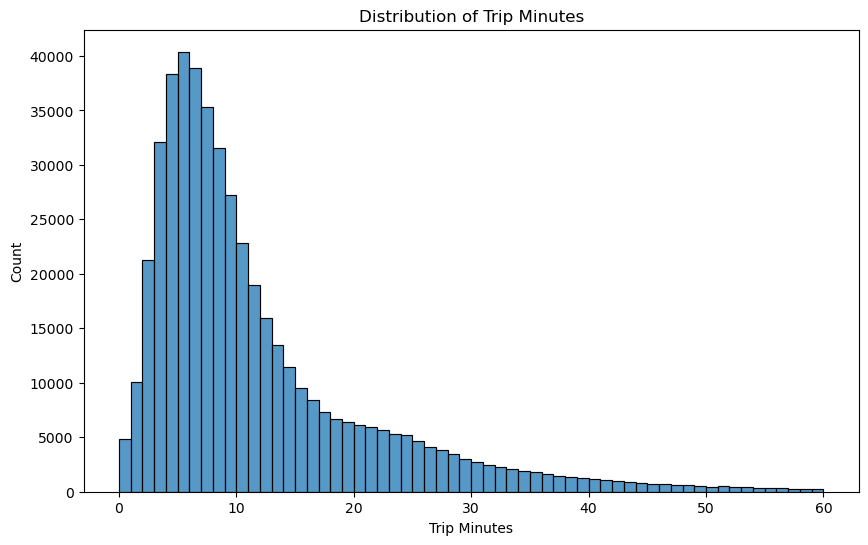

In [65]:
# Plotting the distribution of the 'trip_minutes' column
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df[chicago_taxi_df['trip_minutes'] <= 60]['trip_minutes'], bins=60)
plt.title('Distribution of Trip Minutes')
plt.xlabel('Trip Minutes')
#plt.ylabel('Frequency')
plt.show()

In [66]:
chicago_taxi_df[['trip_miles']].describe()

,trip_miles
count,482177.000000
mean,3.844461
std,5.692938
min,0.010000
25%,0.800000
50%,1.490000
75%,3.700000
max,527.100000


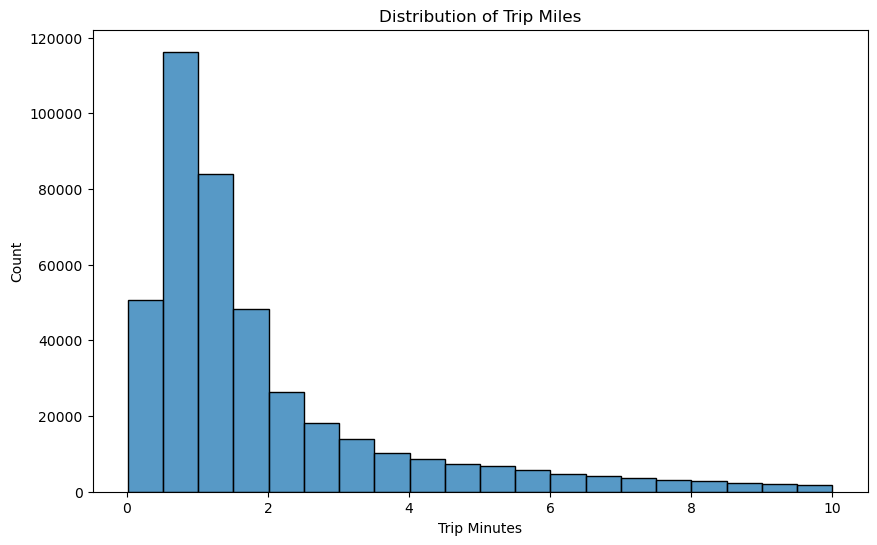

In [67]:
# Plotting the distribution of the 'trip_miles' column
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df[chicago_taxi_df['trip_miles'] <= 10]['trip_miles'], bins=20)
plt.title('Distribution of Trip Miles')
plt.xlabel('Trip Minutes')
#plt.ylabel('Frequency')
plt.show()

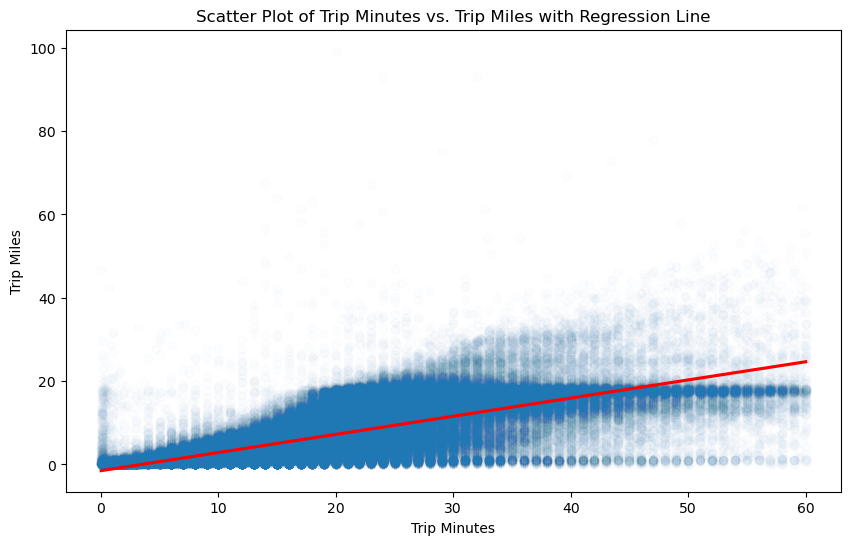

In [68]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_minutes',
            y='trip_miles',
            data=chicago_taxi_df[(chicago_taxi_df['trip_minutes'] <= 60) & (chicago_taxi_df['trip_miles'] <= 100)],
            scatter_kws={'alpha':0.01},
            line_kws={'color':'red'})
plt.title('Scatter Plot of Trip Minutes vs. Trip Miles with Regression Line')
plt.xlabel('Trip Minutes')
plt.ylabel('Trip Miles')
#plt.grid(True)
plt.show()

In [69]:
chicago_taxi_df[chicago_taxi_df['trip_miles'] == 0]

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,trip_minutes
